# Integration of multiple timepoint into a single embedding using Seurat
Dec 8th 2021 <br>
Input: exported files from scanpy 

### Option 1: read from csv export

In [3]:
library(data.table)
library(dplyr)
library(Seurat)
library(viridis)
library(ggExtra)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Loading required package: viridisLite



In [29]:
sapply(ls(), function(x) {get(x) %>% object.size()}) %>% sort() 

ATLAS_FILE      ATLAS_DIR      SCT_ATLAS             p1             p2 
           136            168            232        4202584        4204000 
danio.combined 
    6011919712

### Main directories

In [20]:
ATLAS_DIR = '/mnt/ibm_lg/alejandro/danio-atlas/atlas_objects/seurat_objects/'        # Read QC'd h5ad from here 
SCT_ATLAS = '/mnt/ibm_lg/alejandro/danio-atlas/atlas_objects/timepoint_integration/' # Write integrated Atlas (after SCT pipeline) here

setwd(ATLAS_DIR)

# Main file after QC 
# This comes from Notebook 1 
ATLAS_FILE  = 'danio_atlas_annotated_38k.rds'


### Read a Seurat object -- exported from scanpy 
Exported from h5ad

In [76]:
load(ATLAS_FILE)

Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file 'danio_atlas_annotated_38k.rds', probable reason 'No such file or directory'”


ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


Fix types in cell type annotations

In [31]:
danio.combined@meta.data$timepoint[danio.combined@meta.data$timepoint=='5somite'] <- '05somite'

In [38]:
danio.combined@meta.data$global_annotation[danio.combined@meta.data$global_annotation=='Differentating_Neurons'] <- 'Differentiating_Neurons'
danio.combined@meta.data$global_annotation[danio.combined@meta.data$global_annotation=='Muscles'] <- 'Muscle'
danio.combined@meta.data$global_annotation[danio.combined@meta.data$global_annotation=='Somite'] <- 'Somites'
danio.combined@meta.data$global_annotation[danio.combined@meta.data$global_annotation=='Epiderm'] <- 'Epidermal'

In [39]:
danio.combined@meta.data$global_annotation %>% unique

[1] "Epidermal"               "Neural_Posterior"       
 [3] "Neural_Anterior"         "Lateral_Mesoderm"       
 [5] "PSM"                     "Somites"                
 [7] "Neural_Crest"            "Differentiating_Neurons"
 [9] "Muscle"                  "NMPs"                   
[11] "unassigned"              "Notochord"              
[13] "Endoderm"                "Germline"               
[15] "Adaxial_Cells"

## Standard pipeline
Let first test an standard clustering and asses the batch effect across timepoints

In [3]:
danio = seurat_obj
rm(seurat_obj)

In [9]:
# uncomment this line if reading .csv 
# danio <- CreateSeuratObject(counts = t(aa), meta.data = meta, min.cells=3, min.features = 100)
danio <- PercentageFeatureSet(danio, pattern = "^mt-", col.name = "percent.mt")
danio <- SCTransform(danio, vars.to.regress=c('timepoint'))

## 
danio <- RunPCA(danio, verbose = FALSE, npcs  =100)


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 27160 by 38189

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 47 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 27160 genes



  |======================================================================| 100%


Computing corrected count matrix for 27160 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 5.323455 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out timepoint

Centering data matrix

Set default assay to SCT



In [12]:
danio = RunUMAP(danio, dims = 1:80, n.neighbors = 500)

danio %>% FindNeighbors(dims =1:30) %>% FindClusters( resolution = 3) -> danio

15:56:44 UMAP embedding parameters a = 0.9922 b = 1.112

15:56:44 Read 38189 rows and found 80 numeric columns

15:56:44 Using Annoy for neighbor search, n_neighbors = 500

15:56:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:56:50 Writing NN index file to temp file /tmp/RtmpSUINAw/file401c429334e4

15:56:50 Searching Annoy index using 1 thread, search_k = 50000

15:59:55 Annoy recall = 100%

15:59:55 Commencing smooth kNN distance calibration using 1 thread

16:00:24 Initializing from normalized Laplacian + noise

16:00:50 Commencing optimization for 200 epochs, with 7486952 positive edges

16:01:19 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38189
Number of edges: 1197456

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8966
Number of communities: 92
Elapsed time: 3 seconds


In [13]:
options(repr.plot.width = 14, repr.plot.height = 10, repr.plot.res = 150)

DimPlot(danio, label=T, group.by = 'timepoint')

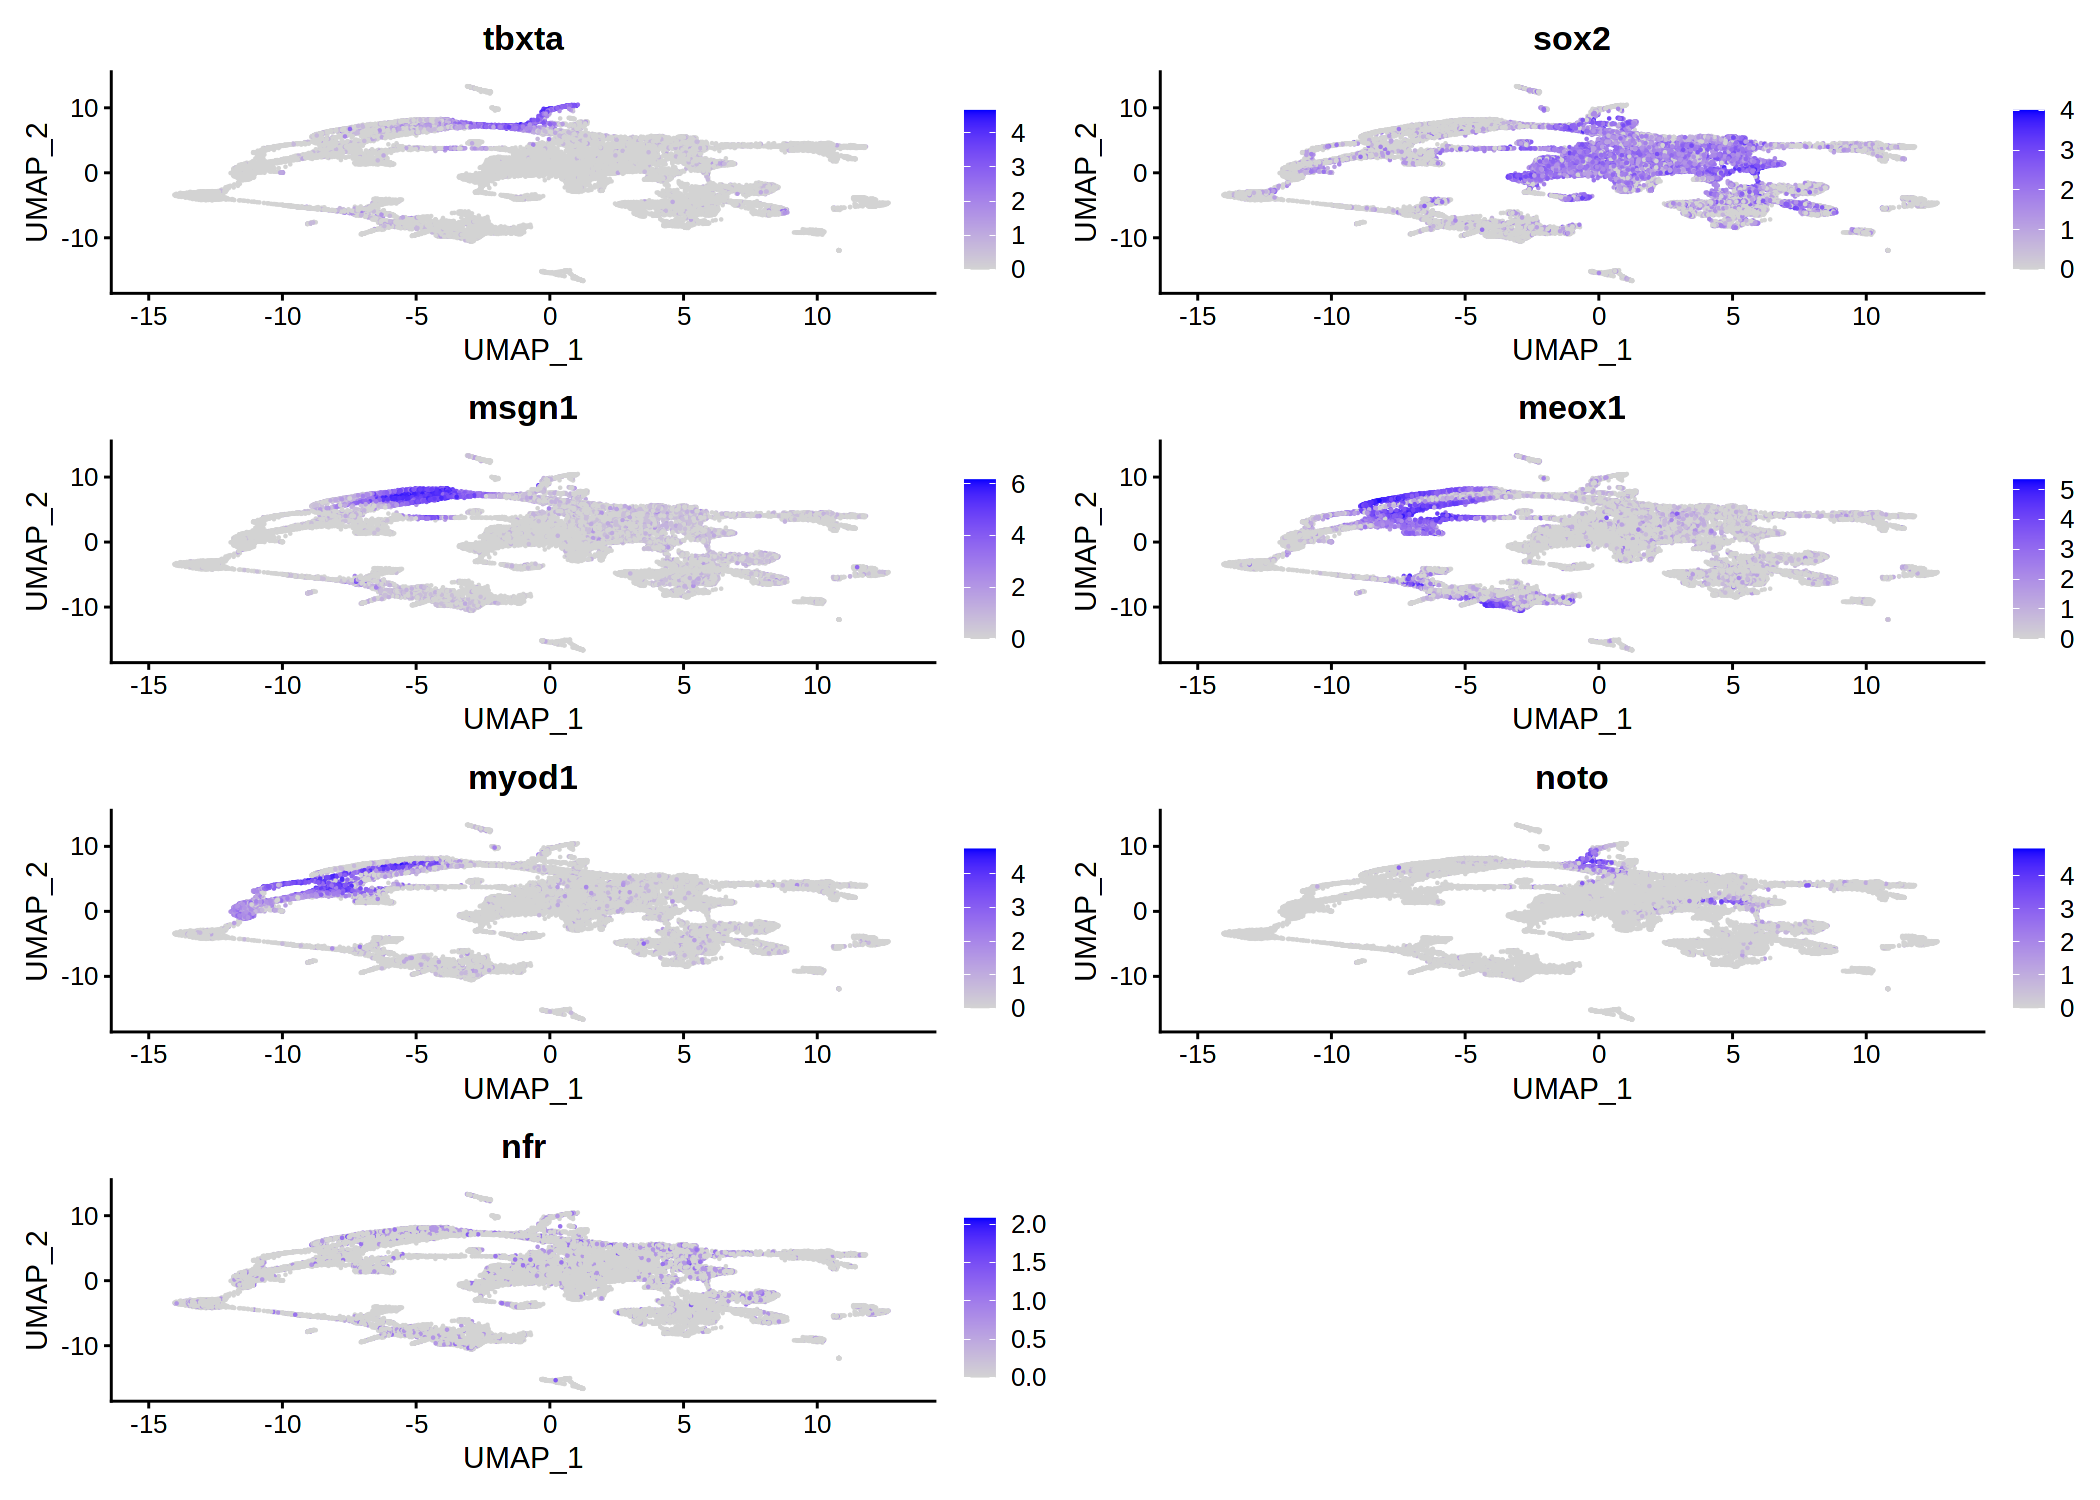

In [15]:
FeaturePlot(danio, c('tbxta','sox2','msgn1','meox1','myod1','noto','nfr'),ncol=2)

# Integration by timepoint
We use Seurat integration here to create a global embedding. As per Seurat's tutorial, recriprocal PCA works best when the timepoints don't have the same cell type composition.  https://satijalab.org/seurat/articles/integration_rpca.html

Load dataset -- exported from scanpy

In [112]:
setwd(ATLAS_DIR) 
load(ATLAS_FILE)

danio <- seurat_obj
rm(seurat_obj)

## Integration of time points
Notes: 
* let's try higher number of variable genes per timepoint for PCA 
* only one time point as reference? 30 somites seems to be fine, so we can use 10 somite as the reference 



In [177]:
danio.list = SplitObject(danio, split.by='timepoint')

danio.list <- lapply(X = danio.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

options(future.globals.maxSize = 6000 * 1024^2)


features <- SelectIntegrationFeatures(object.list = danio.list)

danio.list <- lapply(X = danio.list, FUN = function(x) {
    x <- ScaleData(x, features = features, verbose = FALSE)
    x <- RunPCA(x, features = features, verbose = FALSE)
})

In [178]:
names(danio.list)

[1] "10somite"   "0 budstage" "20somite"   "30somite"   "5somite"   
[6] "15somite"

In [180]:
danio.anchors <- FindIntegrationAnchors(object.list = danio.list, anchor.features = features,
                                       normalization.method = 'LogNormalize', #c("LogNormalize", "SCT"),
                                       dims = 1:50, # default 1:30
                                       k.anchor = 5, #default 5
                                       k.filter = 200, #default 200 for a query cell, If the anchor reference cell is found within the first k.filter (200) neighbors, then we retain this anchor.
                                       k.score = 30, # default 30: For each reference anchor cell, we determine its k.score (30) nearest within-dataset neighbors and its k.score nearest neighbors in the query dataset
                                       reduction = "rpca", # default cca, rpca should be faster 
                                       reference = c(1,6) 
                                       )
danio.combined <- IntegrateData(anchorset = danio.anchors)

Scaling features for provided objects

Computing within dataset neighborhoods

Finding anchors between all query and reference datasets

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2905 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 7296 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 6261 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 7032 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 8140 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2406 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 9312 anchors

Projecting new d

In [181]:
# specify that we will perform downstream analysis on the corrected data note that the
# original unmodified data still resides in the 'RNA' assay
DefaultAssay(danio.combined) <- "integrated"
danio.combined@meta.data$timepoint[danio.combined@meta.data$timepoint=='5somite'] <- '05somite'

# Run the standard workflow for visualization and clustering
danio.combined <- ScaleData(danio.combined, verbose = FALSE)
danio.combined <- RunPCA(danio.combined, npcs = 100, verbose = FALSE)

UMAP parameters

In [199]:
# Default UMAP
danio.combined <- RunUMAP(danio.combined, reduction = "pca", dims = 1:30,
                         metric='euclidean',
                         n.neighbors = 30,
                         local.connectivity  =1, # 1 default
                         repulsion.strength = 1, # 1 default
                         )
danio.combined <- FindNeighbors(danio.combined, reduction = "pca", dims = 1:30)
danio.combined <- FindClusters(danio.combined, resolution = 0.5)

15:56:50 UMAP embedding parameters a = 0.9922 b = 1.112

15:56:50 Read 38189 rows and found 30 numeric columns

15:56:50 Using Annoy for neighbor search, n_neighbors = 30

15:56:50 Building Annoy index with metric = euclidean, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:56:53 Writing NN index file to temp file /tmp/RtmpSUINAw/file401c7d25459e

15:56:53 Searching Annoy index using 1 thread, search_k = 3000

15:57:03 Annoy recall = 100%

15:57:04 Commencing smooth kNN distance calibration using 1 thread

15:57:06 Initializing from normalized Laplacian + noise

15:57:08 Commencing optimization for 200 epochs, with 1607704 positive edges

15:57:23 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38189
Number of edges: 1363827

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9444
Number of communities: 28
Elapsed time: 5 seconds


### Integrated UMAP

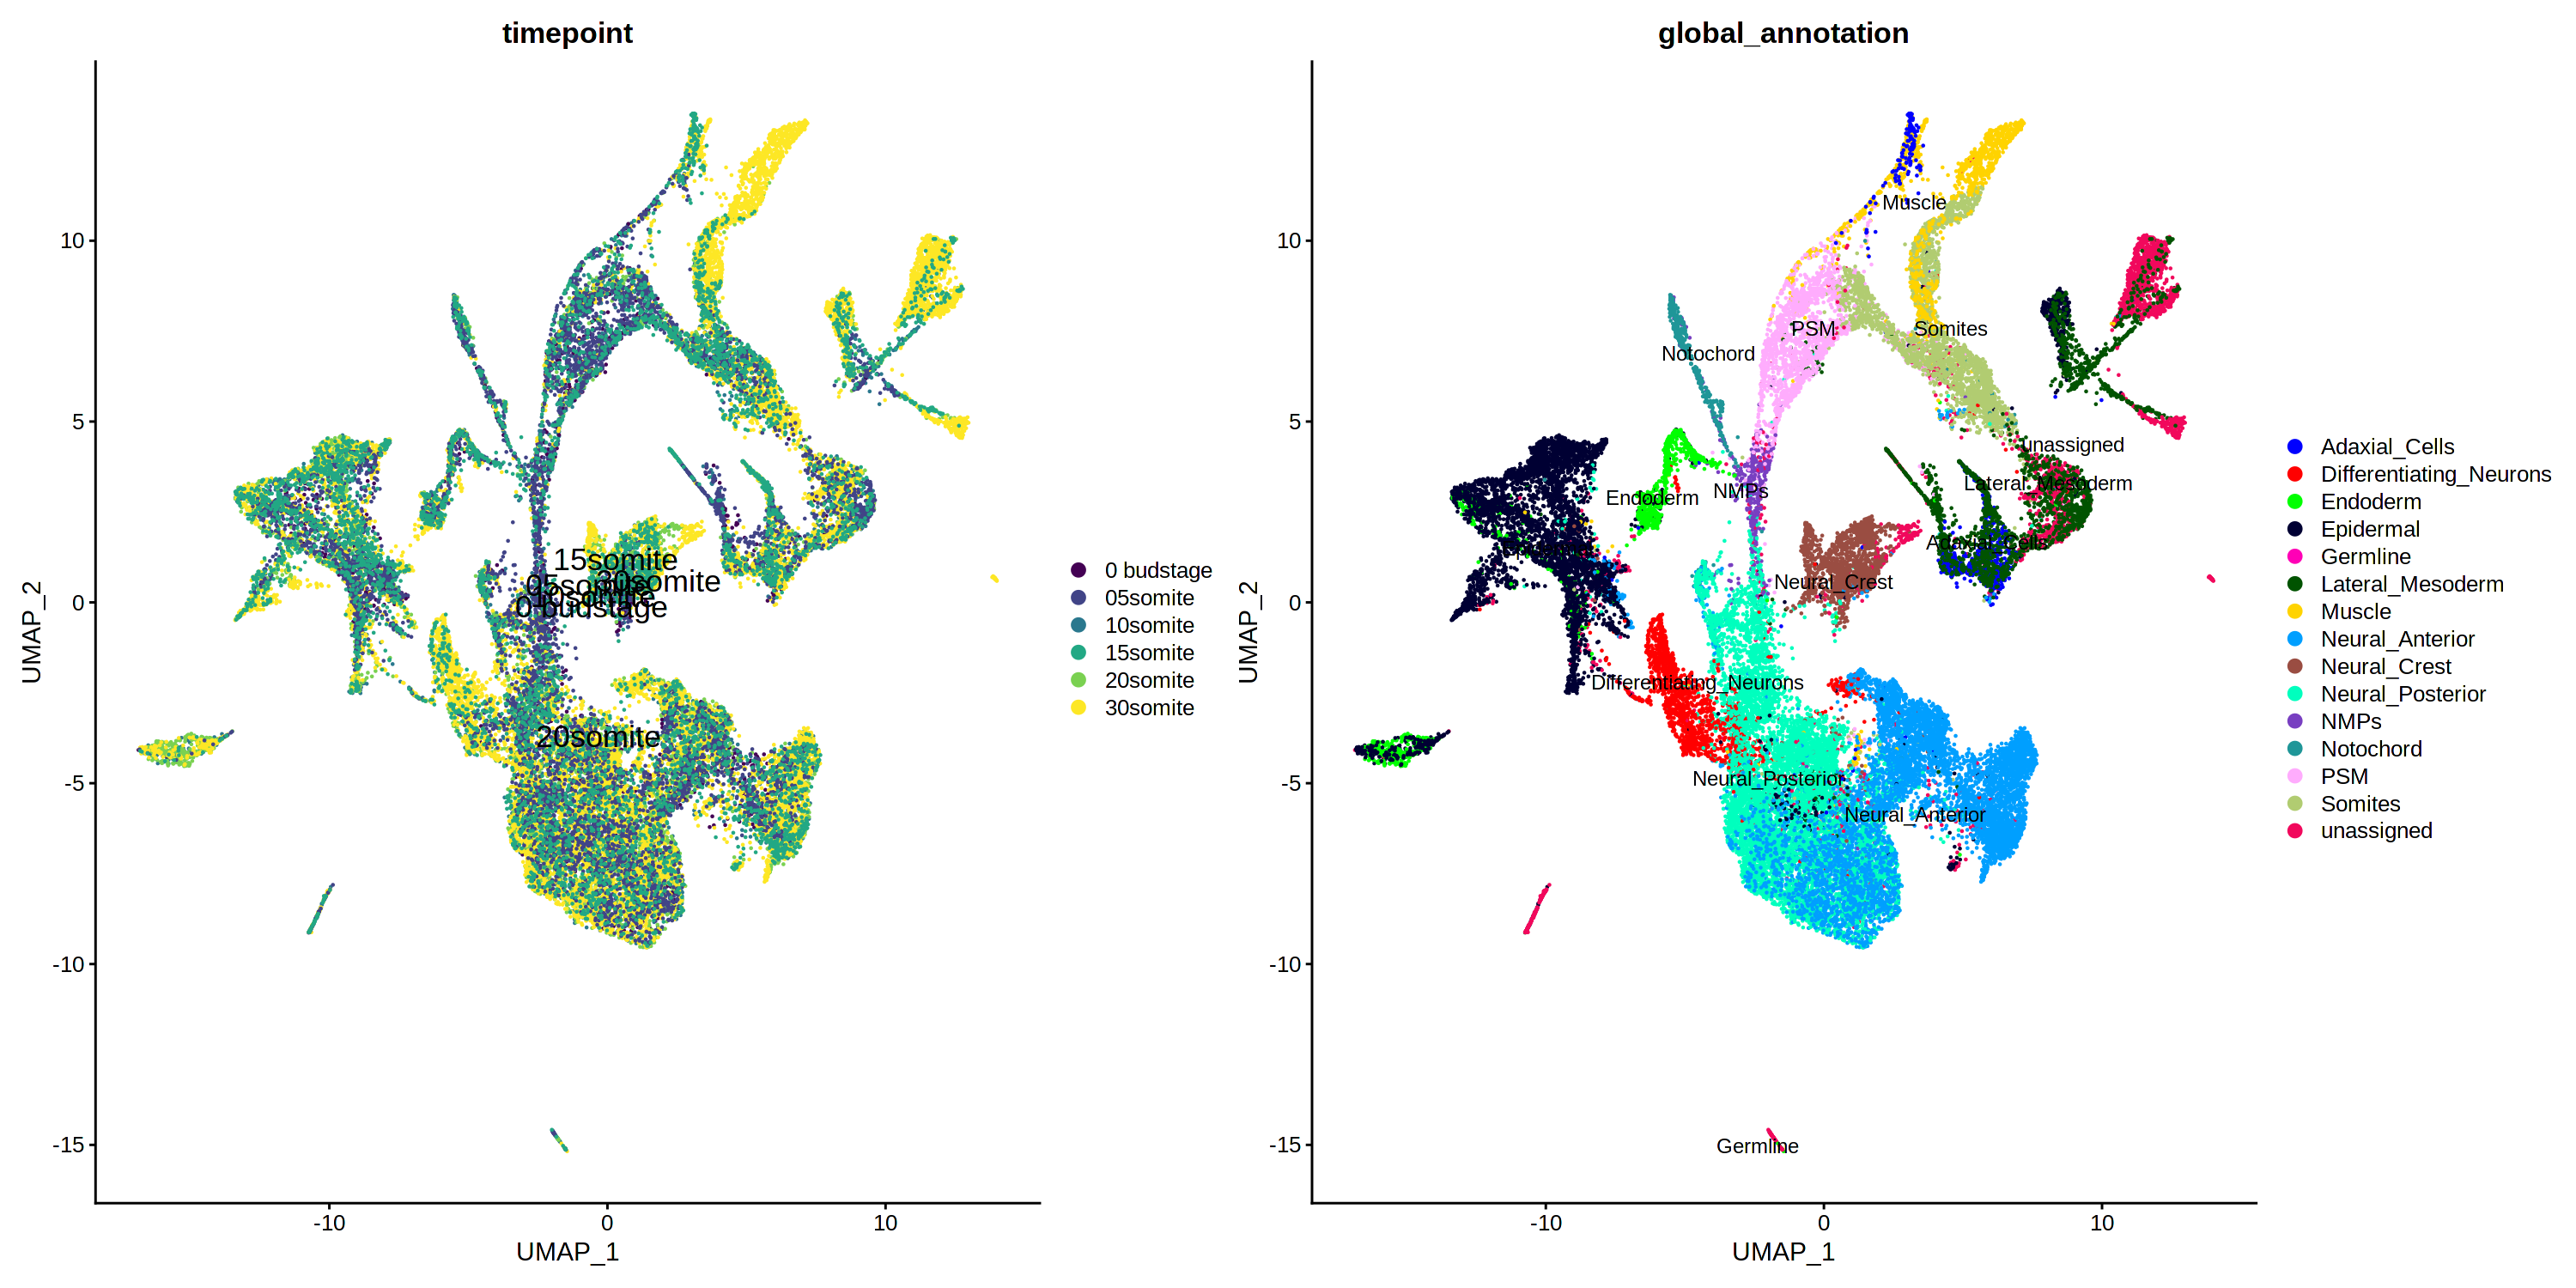

In [8]:
# Visualization
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 150)

p1 <- DimPlot(danio.combined, reduction = "umap", group.by = "timepoint",label = TRUE, cols = viridis(6),
  label.size = 6)
p2 <- DimPlot(danio.combined, reduction = "umap", group.by ='global_annotation', 
              label = TRUE, repel = TRUE, cols = 'glasbey')
p1 + p2

In [ ]:
danio.combined

Access the neighbor graph ( for graph-database ) 

In [18]:
danio.combined@graphs %>% names 

[1] "integrated_nn"  "integrated_snn"

In [201]:
# SAve this version 
save(danio.combined, file = paste0(SCT_ATLAS, 'integration_V2.rdata')) 

In [2]:
# Load object 
load( paste0(SCT_ATLAS, 'integration_V2.rdata') ) 

Key parameter changes: 
<br> Nov 15th 2021
* Euclidean distance in PCA space to generate the UMAP
* More dimensions in CCA space for finging anchors 
* Less dimensions and neighbors for generating UMAP